In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, JLD
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
U0_hom = u0_hom[:];

In [4]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4; const α = 1.58; const ΔU0 = 0.305;

In [5]:
time = 2000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [254]:
index_dot = 65 # 25
I0_hom_dot = I0_hom[index_dot]
U0_hom_dot = U0_hom[index_dot]

println("I0: ", I0_hom[index_dot])
println("U0: ", U0_hom[index_dot])

I0: -1.713636330572293
U0: 0.26554591356027957


In [255]:
I0 = I0_hom_dot; U0 = U0_hom_dot
#I0 = -1.7016; U0 = 0.265

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = shift # [11.325905642223786, 0.6594706953104683, 0.4863175026548461]

ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26554591356027957, 0.305, 0.3, -1.713636330572293]
 time:          0.0
 state:         [8.33953955594192, 0.7384863108241766, 0.4382577518782475]


In [256]:
lyapunovspectrum(ds, 2000, Ttr = 2000)

3-element Vector{Float64}:
  0.48599830996586907
  1.800339706496818e-5
 -3.8462342146074544

In [282]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

index_fp = 1
index_vec = 1
ϵ = 1e-9

Jac = jacob_TM_(fp[index_fp], p, 0)
eivecs = eigvecs(Jac)
shift =  fp[index_fp] + real(eivecs[:, index_vec])*ϵ

3-element SVector{3, Float64} with indices SOneTo(3):
 8.338863492573589
 0.7384853096701203
 0.43825286154213966

In [352]:
prob_backward_time = ODEProblem(TM, shift, (0.0, -1500), p)
prob_forward_time = ODEProblem(TM, shift, (0.0, 10000), p)

ODEProblem with uType SVector{3, Float64} and tType Float64. In-place: false
timespan: (0.0, 10000.0)
u0: 3-element SVector{3, Float64} with indices SOneTo(3):
 8.338863492573589
 0.7384853096701203
 0.43825286154213966

In [341]:
#, abstol = 1e-14, reltol = 1e-14, maxiters = 5000000)
sol_backward = solve(prob_backward_time, alg = Vern9(),  adaptive = true, abstol = 1e-14, reltol = 1e-14, maxiters = 10000000)

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase C:\Users\Alex\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:575


retcode: MaxIters
Interpolation: specialized 9th order lazy interpolation
t: 9999995-element Vector{Float64}:
  0.0
 -0.1498333769762316
 -0.24756798634056318
 -0.3459255744449361
 -0.4350790637813028
 -0.5239776728599048
 -0.6087583702869228
 -0.6985816627897383
 -0.7797870314711538
 -0.8554376053412996
  ⋮
 -6.293565852729925
 -6.2935658540302395
 -6.293565855330554
 -6.2935658566308685
 -6.293565857931183
 -6.293565859231498
 -6.293565860531811
 -6.293565861832125
 -6.2935658631324385
u: 9999995-element Vector{SVector{3, Float64}}:
 [8.338863492573589, 0.7384853096701203, 0.43825286154213966]
 [8.338863494182357, 0.7384853095910401, 0.43825286156132404]
 [8.338863496451134, 0.738485309479519, 0.4382528615883784]
 [8.338863500730339, 0.7384853092691742, 0.438252861639407]
 [8.338863507780706, 0.7384853089226124, 0.4382528617234812]
 [8.338863520213584, 0.7384853083114732, 0.4382528618717406]
 [8.33886354086736, 0.7384853072962333, 0.4382528621180329]
 [8.338863579201234, 0.7384853054

In [353]:
sol_forward = solve(prob_forward_time, alg = Vern9(),  adaptive = true, abstol = 1e-15, reltol = 1e-15, maxiters = 5000000)

retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 3116717-element Vector{Float64}:
     0.0
     0.11601206337643022
     0.16512296941032722
     0.2118888249896519
     0.25441928358205035
     0.2960265437033416
     0.3316545843407129
     0.36556818005903896
     0.39380706956613865
     0.4269228752134298
     ⋮
  9999.978977799803
  9999.981760566767
  9999.98442317913
  9999.98724844197
  9999.989817153766
  9999.993246076212
  9999.995875604704
  9999.998926237306
 10000.0
u: 3116717-element Vector{SVector{3, Float64}}:
 [8.338863492573589, 0.7384853096701203, 0.43825286154213966]
 [8.33886349204993, 0.7384853096958611, 0.438252861535895]
 [8.338863491921723, 0.7384853097021632, 0.4382528615343661]
 [8.338863491831939, 0.7384853097065761, 0.4382528615332955]
 [8.33886349177063, 0.7384853097095895, 0.43825286153256454]
 [8.338863491724826, 0.7384853097118408, 0.4382528615320184]
 [8.338863491694227, 0.738485309713345, 0.43825286153165355]
 [8.338863491

In [372]:
tst_back, ted_back = 1, 300
tst_for, ted_for = 10000,  3100000
idx, idy, idz = 1, 2, 3
lb_size = 30; tck_size = 25;
#dis  = 60;

GLMakie.activate!()
f = Figure(resolution = (700, 700))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 1, 50, 50)


lines!(sol_backward[idx, tst_back:ted_back], sol_backward[idy, tst_back:ted_back], sol_backward[idz, tst_back:ted_back], linewidth = 1.5, color = :blue)
#lines!(sol_forward[idx, tst_for:ted_for], sol_forward[idy, tst_for:ted_for], sol_forward[idz, tst_for:ted_for], linewidth = 1.5, color = :deeppink)


for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)

In [ ]:
tst_for, ted_for = 1, 25000
idx, idy, idz = 1, 3, 2
lb_size = 30; tck_size = 25;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 700))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)


#lines!(sol_backward[idx, tst_back:ted_back], sol_backward[idy, tst_back:ted_back], sol_backward[idz, tst_back:ted_back], linewidth = 1.5, color = :blue)
lines!(sol_forward[idx, tst_for:ted_for], sol_forward[idy, tst_for:ted_for], sol_forward[idz, tst_for:ted_for], linewidth = 1.5, color = :deeppink)


for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end


display(f)

###  СЧИТАЙ В ОБРАТНОМ ВРЕМЕНИ КОЛИЧЕСТВО СПАЙКОВ ПРИДУРОК

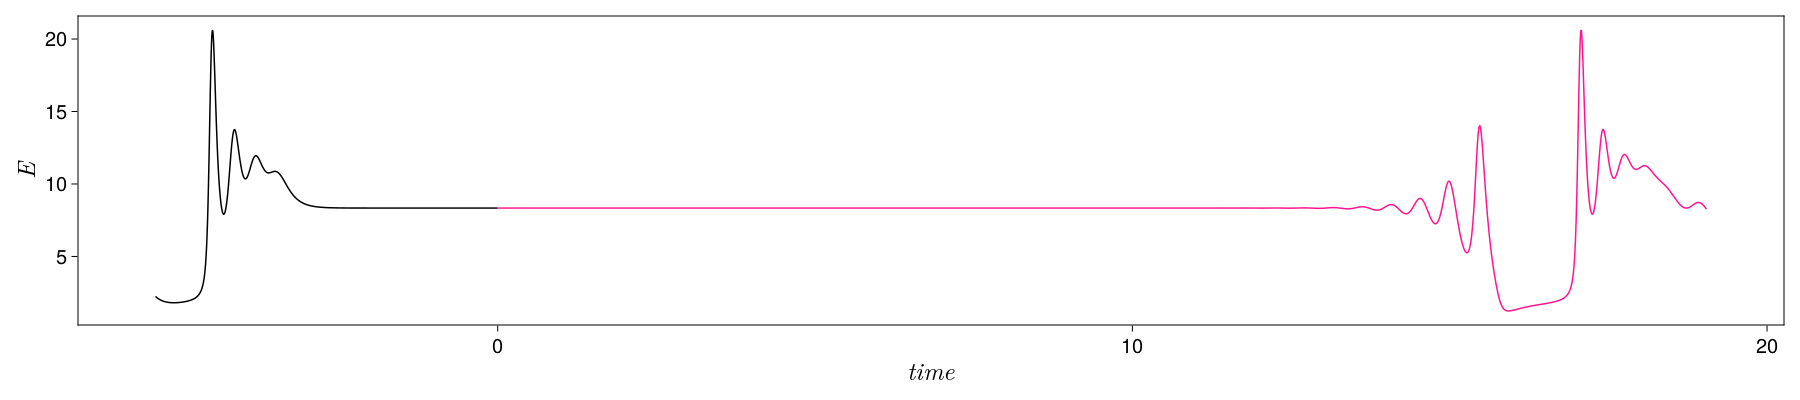

In [317]:
tst_back, ted_back = 1, 300
tst_for, ted_for = 1,  1000

lb_size_ts = 25
tck_size_ts = 20

idxstart, idxend = 1, 377
idxstartbt, idxendbt = 1, 23

CairoMakie.activate!()
f = Figure(resolution = (1800, 400))

axisE = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)

lines!(axisE, sol_backward.t[tst_back:ted_back], sol_backward[1, tst_back:ted_back], linewidth = 1.5, color = :black)
lines!(axisE, sol_forward.t[tst_for:ted_for], sol_forward[1, tst_for:ted_for], linewidth = 1.5, color = :deeppink)
f

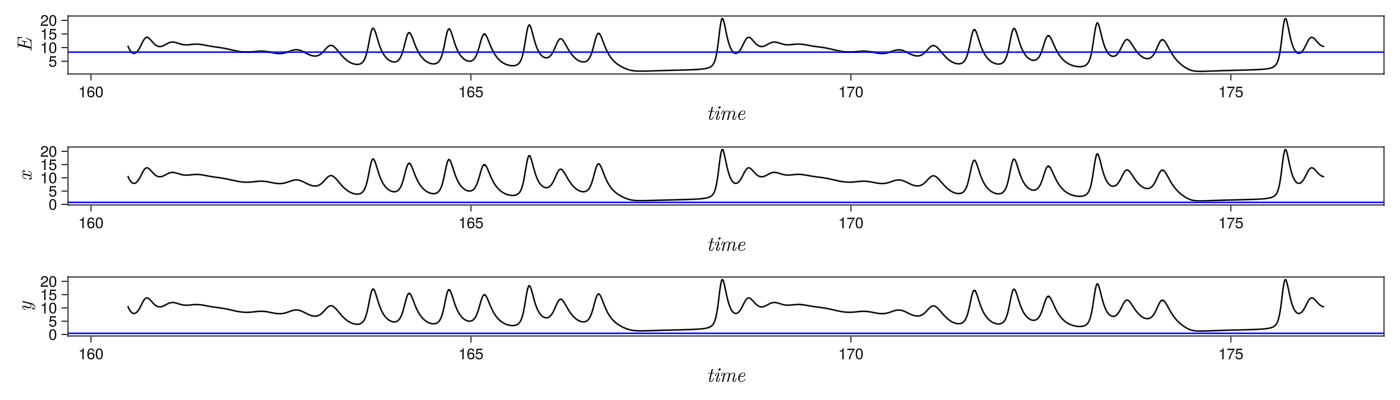

In [366]:
tst_back, ted_back = 1, 300
tst_for, ted_for = 50000,  55000


lb_size_ts = 20
tck_size_ts = 15
f = Figure(resolution = (1400, 400))

axisE = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)
axisx = Axis(f[2, 1], xlabel = L"$time$", ylabel = L"$x$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)
axisy = Axis(f[3, 1], xlabel = L"$time$", ylabel = L"$y$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)

lines!(axisE, sol_forward.t[tst_for:ted_for], sol_forward[1, tst_for:ted_for], linewidth = 1.5, color = :black)
hlines!(axisE, fp[1][1], color = :blue)

lines!(axisx, sol_forward.t[tst_for:ted_for], sol_forward[1, tst_for:ted_for], linewidth = 1.5, color = :black)
hlines!(axisx, fp[1][2], color = :blue)

lines!(axisy, sol_forward.t[tst_for:ted_for], sol_forward[1, tst_for:ted_for], linewidth = 1.5, color = :black)
hlines!(axisy, fp[1][3], color = :blue)

f